# TP : Régression et classification linéaire

source: Rémi Flamary, Alain Rakotomamonjy

## Résumé
Le but de ce TP est de vous faire manipuler l’apprentissage de fonction de prédiction linéaires par
la méthode des moindres carrés et des moindres carrés régularisés sur des données réelles: Vous devrez prédire un mouvement à partir de mesures ECoG (électro-corticogramme).
[Les données sont à télécharger ici](https://github.com/rflamary/mltool/raw/master/data/ECoG_Finger.mat).

## Description des données
Vous utiliserez dans ce TP des données proposées lors de la [compétition BCI IV](https://www.bbci.de/competition/iv/index.html). Une description détaillée des données ainsi que les données brutes elles même sont disponibles [ici](https://www.bbci.de/competition/iv/desc_4.pdf).

**Données** Vous allez travailler sur le jeu de données 4 de cette compétition dont le but est de
prédire la flexion des doigts du sujet à partir de mesures ECoG. Vous travaillerez dans ce TP
sur les signaux d’apprentissage du sujet 3 et vous devrez prédire la flexion de son pouce au cours
du temps.

**Protocole expérimental** Les trois sujets de la base de données sont des patients épileptiques
ayant des capteurs ECoG en place pour des raisons médicales. Les sujets sont équipés de gants
permettant de mesurer la flexion de chacun de leurs doigts. Il est demandé aux sujet de bouger
un de ses doigts avec un ordre visuel. Le signal mesuré pour le sujet 3 consiste en 10 minutes
d’enregistrement à 1000Hz sur 64 électrodes.

**Pré-traitement des données** Le signal ECoG a été filtré avec un filtre passe bas de Savitsky-Golay. Ce filtre permet d’atténuer le bruit et a déjà montré de bonnes performances pour des
taches de prédiction de mouvement. Ensuite le signal est sous-échantillonné de manière à obtenir un signal temporel échantillonné à Fe = 50Hz. Le signal cible (mouvement des doigt) est également sous-échantillonné et uniquement le canal contenant le mouvement du doigt est
conservé. Finalement une détection grossière de mouvement est effectuée et seuls les instants
temporels correspondant à un mouvement sont conservés. Le fichier “ECoG Finger.mat” contient
les variables suivantes :

- $X_{all}$ matrice contenant $n=3327$ exemples de $d=64$ variables
- $Y_{all}$ vecteur contenant les valeurs à prédire
- $Fe$ fréquence d'échantillonage des deux signaux

**Evaluation des performances en prédiction**. Les performances en prédiction seront évaluées
de deux manières. On notera $\hat{y}_i$ la prédiction de notre modèle linéaire au point $x_i$. Tout d’abord en calculant l’erreur au carré moyenne :

$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i -\hat{y}_i)^2 $$

qui devra bien évidemment être la plus petite possible et le coefficient de corrélation :

$$ r = \frac{Cov(\bf{Y},\hat{\bf{Y}})}{\sqrt{Var(\bf{Y})Var(\hat{\bf{Y}})}} $$

ou Cov(., .) est la covariance empirique entre deux vecteurs. Cette mesure est celle qui a été utilisée pour
départager les candidats de la compétition. Elle sera égale à $1$ si les prédictions sont parfaitement
alignées et égale à $0$ si la fonction prédit au hasard

## Régression des moindres carrés

### Visualisation des données

— Charger les données en mémoire. Ces données étant au format Matlab, vous devrez utiliserer la fonction `scipy.io.loadmat` du package python `scipy`.

— Normalisez les données, de telle sorte que la variance empirique de chacune des 64 variables soit de $1$.

— visualiser certains signaux ECoG et les mouvements des doigts sur la même figure en 2D.

— Visualiser en 3D la valeur à prédire y en fonction de deux variables de $Xall$. Tester la visualisation en fonction des variables 43 et 49. La documentation pour faire des graphiques en 3D avec matplotlib est [ici](https://matplotlib.org/stable/gallery/mplot3d/index.html)

— Découper les données en un ensemble d’apprentissage et un ensemble de test ($n_{train}$ = 1000
exemples d’apprentissage). Attention ce sont des données temporelles, il ne faut donc pas permuter les exemples de façon aléatoire.

### Régression des moindres carrés

- Créer la matrice d’apprentissage $X$ en ajoutant
une colonne de $1$ aux exemples d’apprentissage.
— Estimer les paramètres des moindres carrés sur les données d’apprentissage (avec la méthode matricielle vue en cours). stocker ces
paramètres dans un vecteur $w$ et un biais $b$.
— Prédire le mouvement des doigts du sujet pour les signaux ECoG d’apprentissage et de
test. Mesurer la performance dans les deux cas. Que remarquez vous ?

### Régression Ridge (moindre carrés avec régularisation $\ell_2$)

#### Régularisation

— Rappelez vous que la régression Ridge, ou régression régularisée, consiste à trouver la solution à ce problème d'optimisation:

$$ \hat{w},\hat{b} = \arg \min_{w,b} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \lVert w \rVert^2$$

avec $\hat{y}_i=w^\top x_i-b$. Estimer les paramètres de la fonction linéaire dans le cadre de la régression régularisée ridge.
— Prédire les mouvements des doigts sur les exemples d’apprentissage et de test, pour
différentes valeurs du paramètre de régularisation $\lambda$.
— Sélectionner automatiquement les paramètres permettant d’obtenir les meilleurs performances en prédiction sur le jeu de test.

#### Interprétation et sélection de variables
Une fonction linéaire a l’avantage d’être interprétable. En effet le vecteur w contient des
coefficient correspondant à chaque variable dans X. L’amplitude de ces coefficient donnera donc
l’impact de chaque variable dans la fonction de décision.
— Visualiser la valeur absolue des coefficients du vecteur w. Repérer les capteur les plus
importants dans la fonction de prédiction.
— Sélectionner uniquement les variables les plus importantes et refaire l’apprentissage.
Evaluer les performances en utilisant uniquement ce sous-ensemble de variables. ´
— Visualiser en 3D les exemples d’apprentissages avec l’hyperplan définissant la fonction
(sur les deux variables les plus importantes). Refaire la même chose avec les exemples de
test.


# Nouvelle section

# Nouvelle section

In [ ]:
import scipy as scp
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np


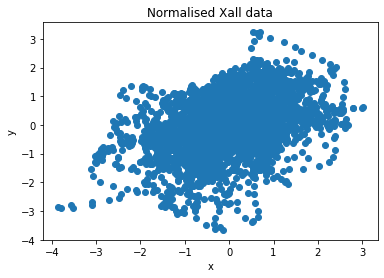

In [ ]:
data = sio.loadmat("ECoG_Finger")
Xall = data['Xall']

#normaliser les données 
#Xall_norm = sk.preprocessing.normalize(data['Xall'])
Xall_norm = preprocessing.scale(Xall)

#representation en figure 2D
x = Xall_norm[:,0]
y = Xall_norm[:,1]

plt.scatter(x, y)
plt.title('Normalised Xall data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


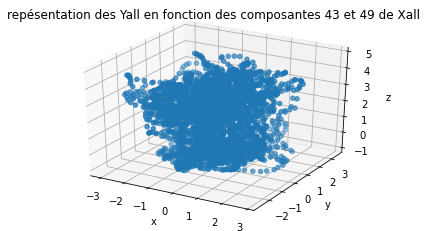

In [ ]:
#visualisation 3D et test avec les valeurs 43 et 49
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = Xall_norm[:,43]
y = Xall_norm[:,49]
z = data['Yall']

ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('repésentation des Yall en fonction des composantes 43 et 49 de Xall')
plt.show()

In [122]:
#decouper les données en ensemble d'aprentissage
Xall_ap = Xall_norm[:1000,:]
Xall_test = Xall_norm[1000:,:]


In [123]:
X1 = np.array(Xall_ap)
C1 = np.ones((1000,1))

X = np.hstack((C1,X1))
X



array([[ 1.        , -1.60328964, -1.28792903, ..., -0.88782825,
         1.09078164, -3.02523085],
       [ 1.        , -1.64164473, -1.29686802, ..., -1.27483938,
         1.12910943, -3.01019735],
       [ 1.        , -1.43571667, -1.48308527, ..., -1.68252231,
         1.0994082 , -3.01629441],
       ...,
       [ 1.        , -0.15152606, -0.41042486, ...,  1.62235515,
        -0.59567526,  0.65242515],
       [ 1.        , -0.15342458, -0.11839791, ...,  1.84048276,
        -0.56336855,  0.82393838],
       [ 1.        , -0.23258781,  0.10609595, ...,  1.88173743,
        -0.45079308,  0.9181915 ]])

In [124]:
#Méthode des moindres carrés

Y=np.array(data['Yall'][:1000,:])
w = np.linalg.inv(X.transpose()@X) @  X.transpose() @ Y
print ( '\n vecteur des paramètres W :',w)

# MSE apprentissage (qui est évidemment nul) 
mse_app = (np.linalg.norm(X@w - Y, ord=2))/1000
print ('\n MSE= ', mse_app**2)
print('\n l'' erreur quadratique est quasi-nulle ce qui est logique, la valeur de mse intéressante est celle du MSE sur les \n prédictions à partir des données test : X_test' )

#calcul des prédictions Y_test pour les données de test en utlisant w

#création de X_test
X1 = np.array(Xall_test)
C1 = np.ones((2327,1))
X_test = np.hstack((C1,X1))

#création de Y_test
Y_test_p = X_test@w #p pour prédiction
Y_test= np.array(data['Yall'][1000:,:])

#Evaluation de la performance par le calcul de la valeur de MSE
mse = np.mean((Y_test_p - Y_test)**2) 
print('\n Evaluation de la performance par le calcul de la valeur du MSE de X_test = ', mse)

#calcul de la corrélation
correlation = np.corrcoef(Y_test_p, Y_test)
print ('\n le coefficient de corrélation : ', correlation[0][1])


 vecteur des paramètres W : [[ 2.03427346]
 [-0.08054735]
 [ 0.11016683]
 [-0.07154597]
 [-0.2932827 ]
 [ 0.26674207]
 [ 0.4155312 ]
 [ 0.14199569]
 [-0.19691381]
 [ 0.56106663]
 [ 0.67477226]
 [-0.50407299]
 [ 0.02077283]
 [ 0.36783767]
 [-0.01069396]
 [-0.1808133 ]
 [-0.03554652]
 [-0.10842664]
 [-0.77772231]
 [-0.62537465]
 [ 0.26389562]
 [-0.64355455]
 [-0.31230546]
 [ 0.30008281]
 [ 0.26679722]
 [ 0.20982276]
 [ 0.18080099]
 [ 0.2051541 ]
 [ 0.29678784]
 [-0.66950446]
 [ 0.12041855]
 [-0.08448315]
 [ 0.10810481]
 [ 0.11320402]
 [-0.40600265]
 [-0.21644929]
 [-0.00425387]
 [-0.05999171]
 [-0.17052568]
 [-0.53585132]
 [ 0.14710564]
 [ 0.26115118]
 [-0.0744018 ]
 [ 0.78626021]
 [-0.08299478]
 [ 0.04658275]
 [-0.17828149]
 [ 0.05240269]
 [ 0.02674992]
 [-1.31918414]
 [ 0.1724788 ]
 [-0.19655704]
 [ 0.15769748]
 [ 0.08113912]
 [ 0.27020643]
 [-0.01104571]
 [-0.00631045]
 [ 0.3873044 ]
 [ 0.24397919]
 [-0.21952966]
 [-0.26399309]
 [-0.15856344]
 [-0.23600086]
 [ 0.04165031]
 [ 0.620657

In [120]:
#partie Ridge

from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score

#Définir les valeurs du paramètre de régularisation λ à essayer
alphas = np.linspace(-0.01, 100, 100)

#Réaliser la régression ridge avec validation croisée pour sélectionner le meilleur λ
reg = RidgeCV(alphas=alphas, cv=5)
reg.fit(Xall_ap, Y)

#Prédire les mouvements des doigts sur les données d'apprentissage et de test
y_ap_pred = reg.predict(Xall_ap)
y_test_pred = reg.predict(Xall_test)

#Arrondir les prédictions à l'entier le plus proche pour obtenir des indicateurs binaires
y_ap_pred_bin = np.round(y_ap_pred)
y_test_pred_bin = np.round(y_test_pred)

#Calculer l'erreur des prédictions
ap_mse = np.mean((Y - y_ap_pred)**2)
test_mse = np.mean((Y_test - y_test_pred)**2)

#afficher la meilleure valeur de λ et l'erreur des prédictions
print("meilleur λ:", reg.alpha_)
print("mse apprentissage:", ap_mse)
print("mse test:", test_mse)

meilleur λ: 100.0
mse apprentissage: 0.6482783423578777
mse test: 2.049301020479491
